In [ ]:
import pandas as pd
import os 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

- to do 
- 35 - 31 days out basline availability
- timestamps until filled

# Load files

In [2]:
fname = "/home/jordan/NapaliChecker/permit_availability.csv"
tmp1 = pd.read_csv(fname, parse_dates = ['time checked'], infer_datetime_format = True)
tmp1.head()

,Unnamed: 0,availability,date,time checked
0,0,0,Jun 19,2020-06-19 11:16:07.639675
1,1,0,Jun 20,2020-06-19 11:16:07.639675
2,2,0,Jun 21,2020-06-19 11:16:07.639675
3,3,0,Jun 22,2020-06-19 11:16:07.639675
4,4,0,Jun 23,2020-06-19 11:16:07.639675


In [3]:
fname = "/home/jordan/NapaliChecker/permit_availability_hobbiton.csv"
tmp = pd.read_csv(fname, parse_dates = ['time checked'], infer_datetime_format = True)
tmp.head()

,Unnamed: 0,time checked,date,availability
0,0,2020-07-04 12:27:26.933765,Jul 29,0
1,1,2020-07-04 12:27:26.933765,Jul 30,0
2,2,2020-07-04 12:27:26.933765,Jul 31,0
3,3,2020-07-04 12:27:26.933765,Aug 1,0
4,4,2020-07-04 12:27:26.933765,Aug 2,0


In [8]:
permit_availability = pd.concat([tmp,tmp1], sort = False, ignore_index=True)
permit_availability.head()

,Unnamed: 0,time checked,date,availability
0,0,2020-07-04 12:27:26.933765,Jul 29,0
1,1,2020-07-04 12:27:26.933765,Jul 30,0
2,2,2020-07-04 12:27:26.933765,Jul 31,0
3,3,2020-07-04 12:27:26.933765,Aug 1,0
4,4,2020-07-04 12:27:26.933765,Aug 2,0


In [9]:
# change dates to 2020 and format
permit_availability['date'] = permit_availability['date'] + ' 2020'
permit_availability['date'] = permit_availability['date'].apply(lambda x: dt.datetime.strptime(x, '%b %d %Y'))

In [10]:
permit_availability.head()

,Unnamed: 0,time checked,date,availability
0,0,2020-07-04 12:27:26.933765,2020-07-29,0
1,1,2020-07-04 12:27:26.933765,2020-07-30,0
2,2,2020-07-04 12:27:26.933765,2020-07-31,0
3,3,2020-07-04 12:27:26.933765,2020-08-01,0
4,4,2020-07-04 12:27:26.933765,2020-08-02,0


In [12]:
#create time delta between target data and time checked
permit_availability['time checked'] = permit_availability['time checked'] - dt.timedelta(hours=3) # align to hawaii
permit_availability['td'] = permit_availability['date'] - permit_availability['time checked']
permit_availability['td_s'] = permit_availability['td'].dt.total_seconds()/60/60/24

In [13]:
# money
permit_availability['baseline'] = permit_availability['td'] >= dt.timedelta(days=31)
permit_availability['w_o_i'] = (permit_availability['td'] < dt.timedelta(days=32))& (permit_availability['td'] > dt.timedelta(days=29))
# permit_availability['w_o_i'] = (permit_availability['td'] < dt.timedelta(days=31)) & (permit_availability['td'] > dt.timedelta(days=29))

In [14]:
permit_availability.head()

,Unnamed: 0,time checked,date,availability,td,td_s,baseline,w_o_i
0,0,2020-07-04 09:27:26.933765,2020-07-29,0,24 days 14:32:33.066235,24.605938,False,False
1,1,2020-07-04 09:27:26.933765,2020-07-30,0,25 days 14:32:33.066235,25.605938,False,False
2,2,2020-07-04 09:27:26.933765,2020-07-31,0,26 days 14:32:33.066235,26.605938,False,False
3,3,2020-07-04 09:27:26.933765,2020-08-01,0,27 days 14:32:33.066235,27.605938,False,False
4,4,2020-07-04 09:27:26.933765,2020-08-02,0,28 days 14:32:33.066235,28.605938,False,False


In [15]:
# determine baseline availability
print('average availability > 30 days out is ' + 
      str(permit_availability[permit_availability['baseline'] == True]['availability'].mean()) + '\n',
      'min availability > 30 days out is ' + 
      str(permit_availability[permit_availability['baseline'] == True]['availability'].min()) + '\n',
      'max availability > 30 days out is ' + 
      str(permit_availability[permit_availability['baseline'] == True]['availability'].max()))

average availability > 30 days out is 45.07651715039578
 min availability > 30 days out is 8
 max availability > 30 days out is 60


# Make line plots for each day

In [16]:
day_of = permit_availability[permit_availability['w_o_i'] == True]
day_of = day_of.set_index('time checked')
day_of.head()

,Unnamed: 0,date,availability,td,td_s,baseline,w_o_i
time checked,,,,,,,
2020-07-04 09:27:29.569170,5,2020-08-03,6,29 days 14:32:30.430830,29.605908,False,True
2020-07-04 09:27:29.569170,6,2020-08-04,4,30 days 14:32:30.430830,30.605908,False,True
2020-07-04 09:27:29.569170,7,2020-08-05,14,31 days 14:32:30.430830,31.605908,True,True
2020-07-04 09:33:18.835362,15,2020-08-03,4,29 days 14:26:41.164638,29.601865,False,True
2020-07-04 09:33:18.835362,16,2020-08-04,2,30 days 14:26:41.164638,30.601865,False,True


In [ ]:
# grpd = day_of.groupby('date')
# for name,group in grpd:
#     ax = group.plot(x='td_s',y='availability', kind = 'scatter')
#     ax.axvline(30, color = 'r')
#     plt.title(str(name), fontsize=15)

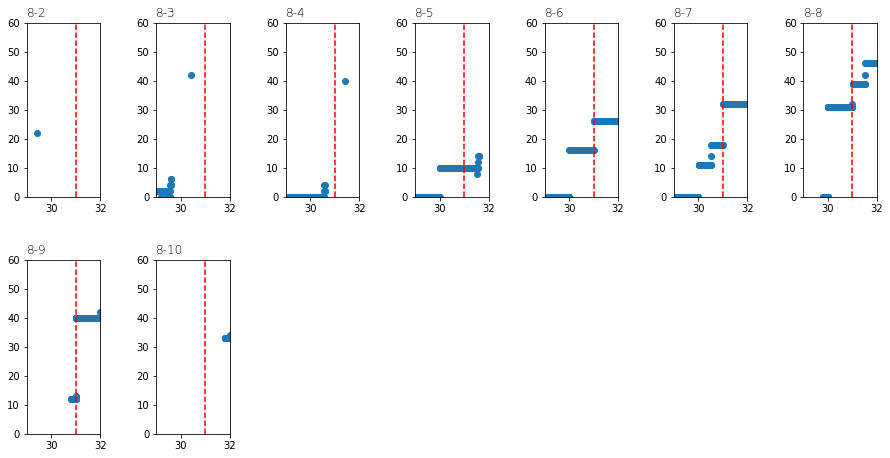

In [22]:
palette = plt.get_cmap('Set1')
plt.figure(figsize=(13,7))
grpd = day_of.groupby('date')
num=0
for name,group in grpd:
    num+=1
    tmp_title = str(name.month) + '-' +str(name.day)
    plt.subplot(2,7,num)
    plt.scatter(x='td_s',y='availability', data = group)
    plt.ylim(0,60)
    plt.xlim(29,32)
    plt.title(tmp_title, loc='left', fontsize=12, fontweight=0)
    plt.axvline(31, color = 'r', linestyle='dashed')
plt.tight_layout(pad=3.0)

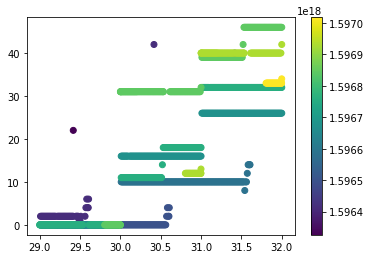

In [19]:
# ted plot
plt.scatter(
            x = day_of['td_s'],
            y = day_of['availability'],
            c = day_of['date'])

plt.colorbar()

# heatmap
- filter out so only complete data in time range
- deal with diff sampling rates 
- turn into np.array
- plt.imshow()

# moar lines

In [26]:
aligned_permits = permit_availability
aligned_permits['aligned'] = aligned_permits['td'] - dt.timedelta(days=30)
aligned_permits['aligned_s'] = aligned_permits['aligned'].dt.total_seconds()/60/60/24
aligned_permits = aligned_permits[aligned_permits['w_o_i'] == True]
aligned_permits.head(n=10)

,Unnamed: 0,time checked,date,availability,td,td_s,baseline,w_o_i,aligned,aligned_s
5,5,2020-07-04 09:27:29.569170,2020-08-03,6,29 days 14:32:30.430830,29.605908,False,True,-1 days +14:32:30.430830,-0.394092
6,6,2020-07-04 09:27:29.569170,2020-08-04,4,30 days 14:32:30.430830,30.605908,False,True,0 days 14:32:30.430830,0.605908
7,7,2020-07-04 09:27:29.569170,2020-08-05,14,31 days 14:32:30.430830,31.605908,True,True,1 days 14:32:30.430830,1.605908
15,15,2020-07-04 09:33:18.835362,2020-08-03,4,29 days 14:26:41.164638,29.601865,False,True,-1 days +14:26:41.164638,-0.398135
16,16,2020-07-04 09:33:18.835362,2020-08-04,2,30 days 14:26:41.164638,30.601865,False,True,0 days 14:26:41.164638,0.601865
17,17,2020-07-04 09:33:18.835362,2020-08-05,14,31 days 14:26:41.164638,31.601865,True,True,1 days 14:26:41.164638,1.601865
25,25,2020-07-04 09:45:43.624008,2020-08-03,4,29 days 14:14:16.375992,29.593245,False,True,-1 days +14:14:16.375992,-0.406755
26,26,2020-07-04 09:45:43.624008,2020-08-04,2,30 days 14:14:16.375992,30.593245,False,True,0 days 14:14:16.375992,0.593245
27,27,2020-07-04 09:45:43.624008,2020-08-05,14,31 days 14:14:16.375992,31.593245,True,True,1 days 14:14:16.375992,1.593245
35,35,2020-07-04 10:00:37.627728,2020-08-03,6,29 days 13:59:22.372272,29.582898,False,True,-1 days +13:59:22.372272,-0.417102


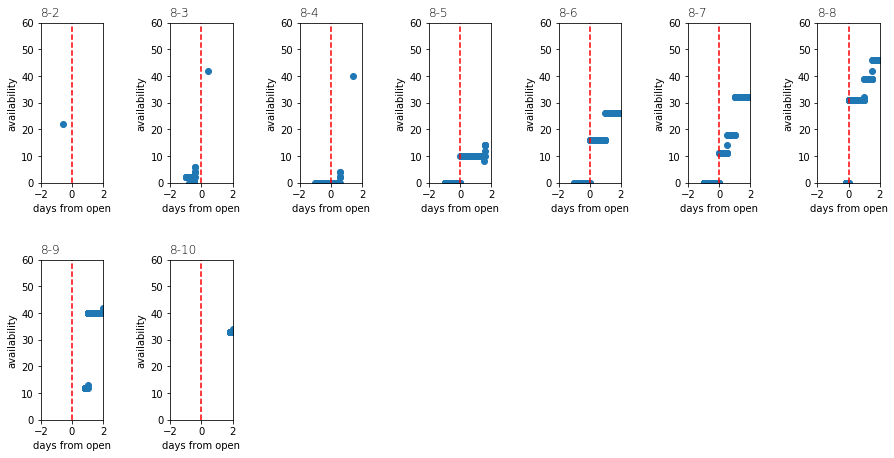

In [27]:
palette = plt.get_cmap('Set1')
plt.figure(figsize=(13,7))
grpd = aligned_permits.groupby('date')
num=0
for name,group in grpd:
    num+=1
    tmp_title = str(name.month) + '-' +str(name.day)
    plt.subplot(2,7,num)
    plt.scatter(x='aligned_s',y='availability', data = group)
    plt.ylim(0,60)
    plt.xlim(-2,2)
    plt.xlabel('days from open')
    plt.ylabel('availability')
    plt.title(tmp_title, loc='left', fontsize=12, fontweight=0)
    plt.axvline(0, color = 'r', linestyle='dashed')
plt.tight_layout(pad=3.0)
plt.savefig('/home/jordan/NapaliChecker/window.pdf')